<a href="https://colab.research.google.com/github/RizkyFitriAndini/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


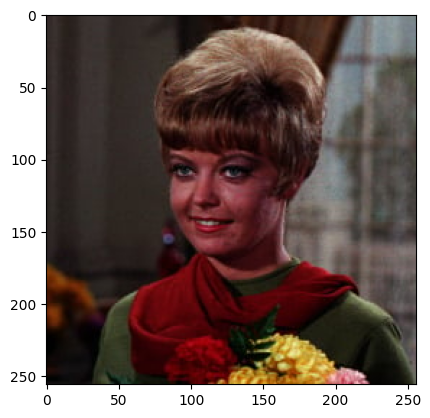

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


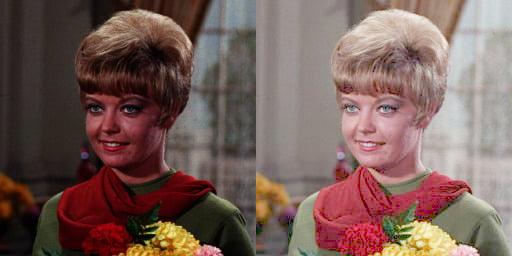

In [4]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat SImulasi Image Depth

Image Depth
----------------------


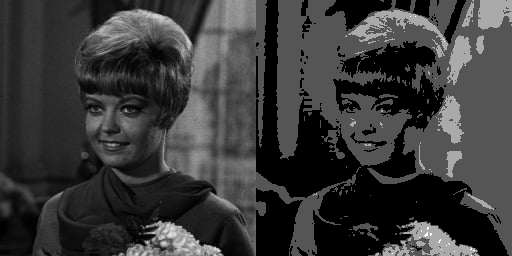

In [6]:
print('Image Depth')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg', cv.IMREAD_GRAYSCALE)
img_depth = np.zeros(original.shape,original.dtype)

# melakukan akses setiap piksel pada grayscale
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    img_depth[y,x] = np.clip(round(original[y,x] / level)*level,0,255)

final_frame = cv.hconcat((original,img_depth))
cv2_imshow(final_frame)

3.  Buat modul Average Denoising

3.1 Jumlah Citra di Average 5

Nilai PSNR (db):  19.531825480527427  dB


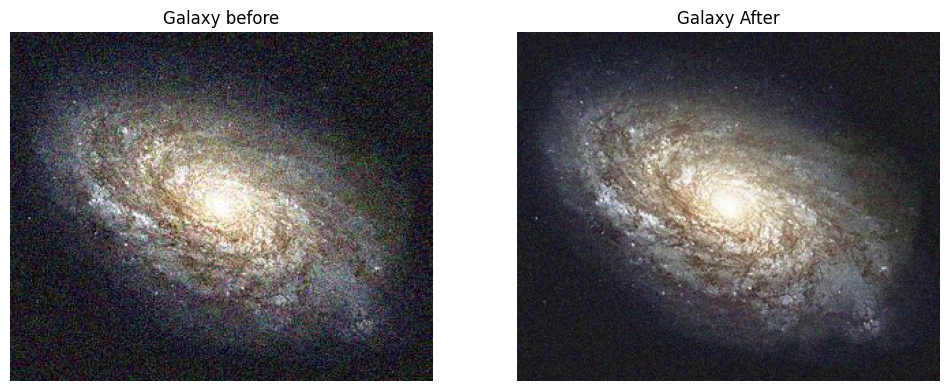

In [8]:
import glob
import cv2
from math import sqrt, log10

def PSNR(img1, img2):
  mse = np.mean((img1-img2)**2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 5 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.2 Jumlah Citra di Average 10

Nilai PSNR (db):  19.73063653862284  dB


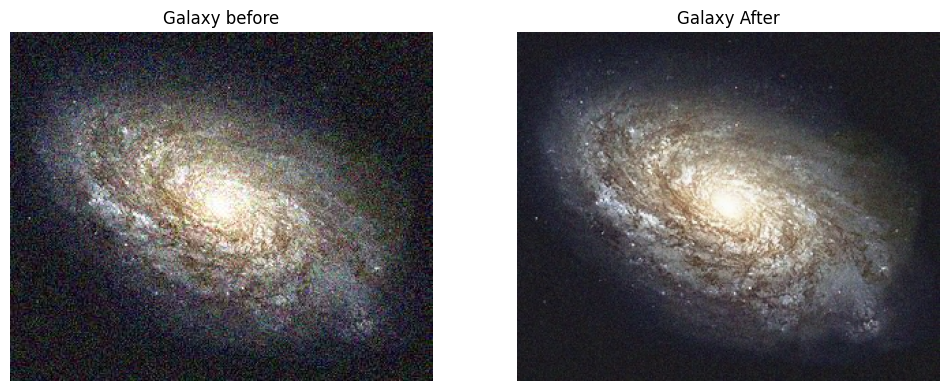

In [11]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')
# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 10 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.3 Jumlah Citra di Average 20

Nilai PSNR (db):  19.836614600222177  dB


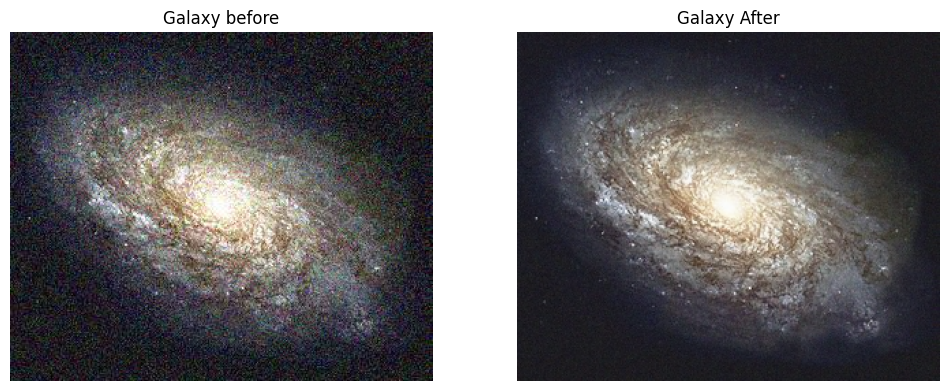

In [12]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 20 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.4 Jumlah Citra di Average 40

Nilai PSNR (db):  19.89151271055174  dB


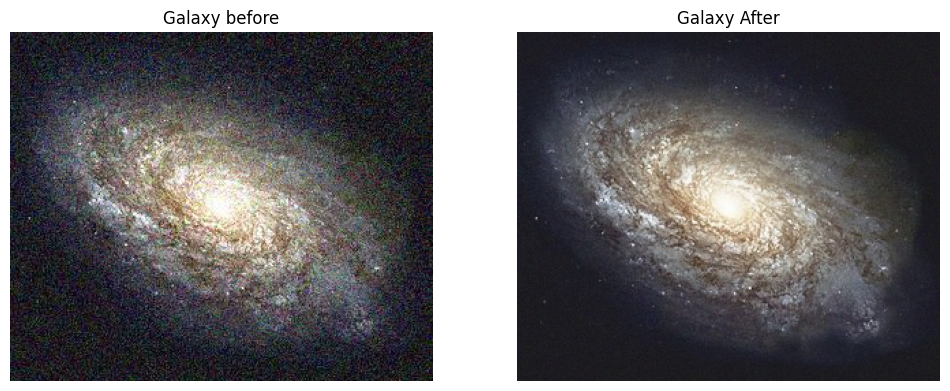

In [13]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 40 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

3.5 Jumlah Citra di Average 80

Nilai PSNR (db):  19.917187259975087  dB


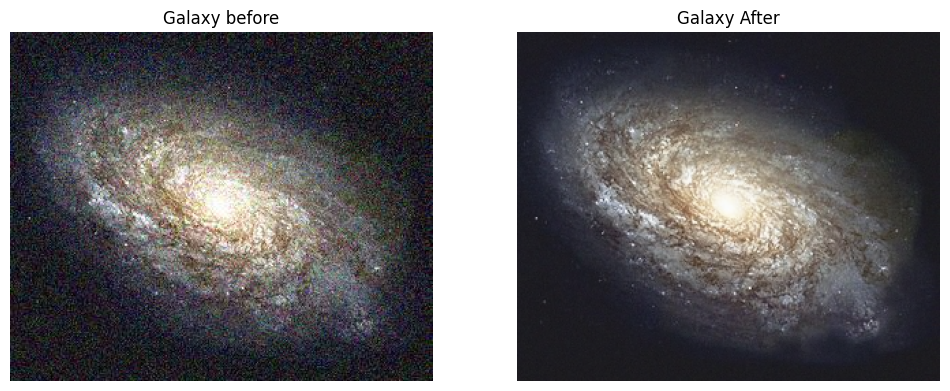

In [14]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 80 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()


3.6 Jumlah Citra di Average 100

Nilai PSNR (db):  19.92196095594035  dB


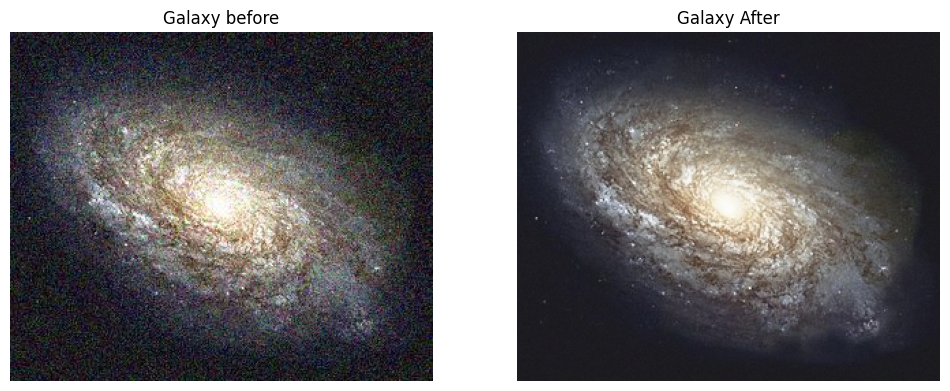

In [15]:
# membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/galaxy.jpg')

# membaca semua citra yang tersimpan dalam satu folder
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Assets/Assets/noises/*.jpg'):
  n = cv2.imread(img) # Use cv2 instead of cv
  cv_img.append(n)

denoised_img = np.zeros(cv_img[0].shape)
jmlGambar = 100 #Memasukkan Jumlah Citra di Avarage
for i in range(jmlGambar):
  denoised_img = denoised_img + cv_img[i]
denoised_img = np.uint16(denoised_img/jmlGambar)

psnr = PSNR(original_img,denoised_img)

print('Nilai PSNR (db): ', psnr, ' dB')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv_img[0], cv2.COLOR_BGR2RGB))
plt.title('Galaxy before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
plt.title('Galaxy After')
plt.axis('off')

plt.show()

4. Buat image masking

4.1 NOT

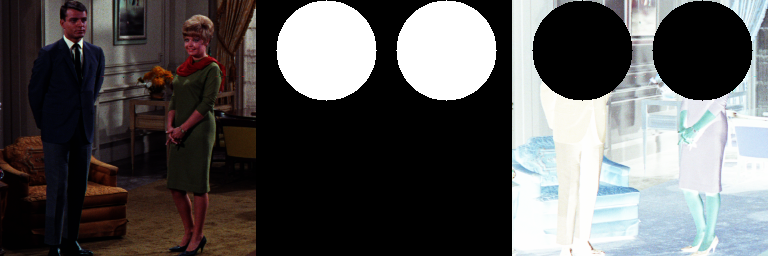

In [17]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/PCVK/Assets/Assets/couple.tiff')

mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = ~img & ~mask

final_frame = cv2.hconcat((img, mask, masked))
cv2_imshow(final_frame)

4.2 OR

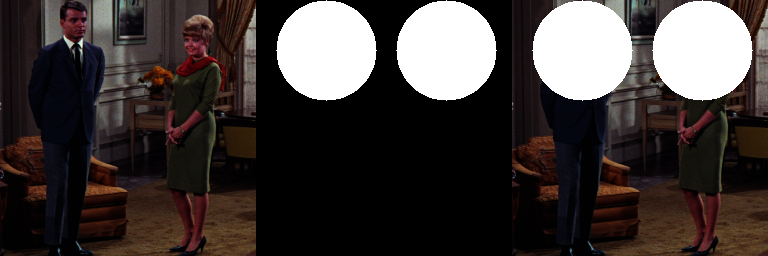

In [18]:
mask = np.zeros(img.shape,img.dtype)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)

result = img & mask

mask2 = np.zeros(img.shape, img.dtype)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask2

masked = img | mask

final_frame = cv2.hconcat((img,mask,masked))
cv2_imshow(final_frame)


4.3 AND

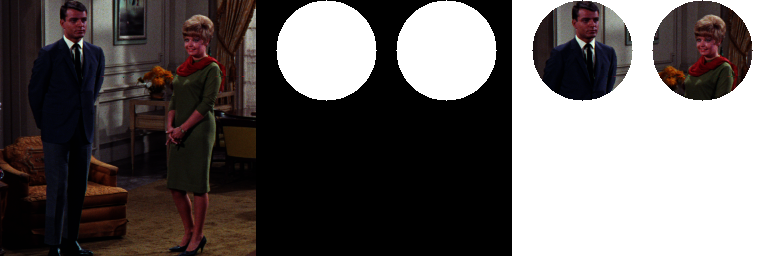

In [19]:
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv2.hconcat((img,mask,result))
cv2_imshow(final_frame)


4.4 NAND

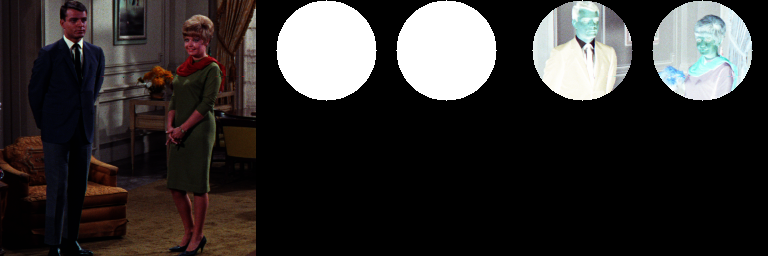

In [22]:
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

masked = ~img & mask

final_frame = cv2.hconcat((img, mask, masked))
cv2_imshow(final_frame)

4.5 XOR

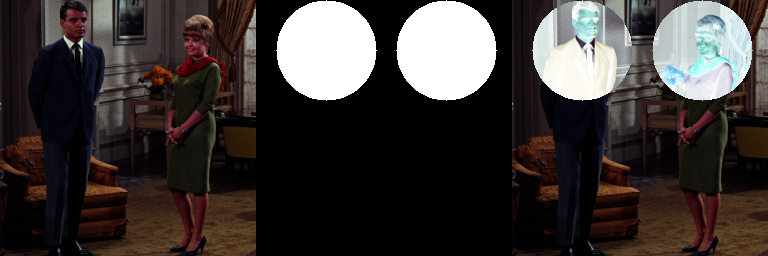

In [21]:
mask = np.zeros(img.shape,dtype=np.uint8)
mask = cv2.circle(mask, (70,50), 50, (255,255,255), -1)
mask2 = np.zeros(img.shape,dtype=np.uint8)
mask2 = cv2.circle(mask, (190,50), 50, (255,255,255), -1)

masked = cv2.bitwise_xor(img, mask)

final_frame = cv2.hconcat((img, mask, masked))
cv2_imshow(final_frame)

# TUGAS